<a href="https://colab.research.google.com/github/ioloi1128/CDA/blob/main/CDA_week10_1_EOF_partV_SLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install numpy
!pip install xarray
!pip install matplotlib
!pip install scipy
!pip install pandas

!apt-get install libproj-dev proj-data proj-bin
!apt-get install libgeos-dev
!pip install cython
!pip install cartopy

!apt-get -V -y -qq install python-cartopy python3-cartopy
!pip uninstall shapely -y
!pip install shapely --no-binary shapely

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libproj-dev is already the newest version (4.9.3-2).
libproj-dev set to manually installed.
proj-data is already the newest version (4.9.3-2).
proj-data set to manually installed.
The following NEW packages will be installed:
  proj-bin
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 32.3 kB of archives.
After this operation, 110 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 32.3 kB in 0s (263 kB/s)
Selecting previously unselected package proj-bin.
(Reading database ... 155455 files and directories currently installed.)
Preparing to unpack .../proj-bin_4.9.3-2_amd64.deb ...
Unpacking proj-bin (4.9.3-2) ...
Setting up proj-bin (4.9.3-2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Reading package lists... Done
Building dependency tree       
Reading state 

In [5]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import pandas as pd

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [6]:
!pip install eofs
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from eofs.xarray import Eof
from eofs.examples import example_data_path

In [7]:
#read precipitation
#url = 'https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis2.derived/surface/mslp.mon.mean.nc'
#ds = xr.open_dataset(url)
ds = xr.open_dataset("/content/drive/MyDrive/Colab_data/slp.mon.mean.nc")
ds = ds.sel(time=slice('1979', '2019'))
ds.load()
ds

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 492)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2019-12-01
Data variables:
    slp      (time, lat, lon) float32 1.023e+03 1.023e+03 ... 1.005e+03
Attributes:
    description:    Data is from NMC initialized reanalysis\n(4x/day).  These...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Thu May  4 18:12:35 2000: ncrcat -d time,0,622 /Datasets/...
    title:          monthly mean slp from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [8]:
#ds_prec = ds_prec.sel(time=slice('1979', '2019'))


ds_climo=ds.groupby('time.month').mean()
ds_anoms=ds.groupby('time.month')-ds_climo
ds_anoms

ds_anoms=ds_anoms.reindex(lat=list(reversed(ds_anoms['lat'])))
#ds_prec=ds_anoms.sel(lat=slice(10,60),lon=slice(90,150))


In [9]:
ds_mslp=ds_anoms.sel(lat=slice(-90,0),lon=slice(0,360))

In [10]:
print(ds_mslp)

<xarray.Dataset>
Dimensions:  (lat: 37, lon: 144, time: 492)
Coordinates:
  * lat      (lat) float32 -90.0 -87.5 -85.0 -82.5 -80.0 ... -7.5 -5.0 -2.5 0.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2019-12-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    slp      (time, lat, lon) float32 -9.675 -9.675 -9.675 ... 0.09827 0.04822


In [12]:
#ds_prec = ds_prec.sel(time=ds_prec.time.dt.month.isin([7,8,9])) #JJA
#ds_prec_avg = ds_prec.mean(dim=('time'))
mslp = ds_mslp['slp']
mslp

<xarray.DataArray 'slp' (time: 492, lat: 37, lon: 144)>
array([[[-9.67504883e+00, -9.67504883e+00, -9.67504883e+00, ...,
         -9.67504883e+00, -9.67504883e+00, -9.67504883e+00],
        [-1.06436768e+01, -1.06891479e+01, -1.07255859e+01, ...,
         -1.04931030e+01, -1.05493774e+01, -1.06030884e+01],
        [-8.82360840e+00, -8.83465576e+00, -8.84704590e+00, ...,
         -8.73925781e+00, -8.77972412e+00, -8.79974365e+00],
        ...,
        [-7.19665527e-01, -6.31286621e-01, -5.56152344e-01, ...,
         -7.68859863e-01, -7.48291016e-01, -7.64282227e-01],
        [-8.90136719e-01, -7.56347656e-01, -6.43615723e-01, ...,
         -8.28735352e-01, -8.68530273e-01, -9.21386719e-01],
        [-8.87390137e-01, -7.72277832e-01, -6.70288086e-01, ...,
         -7.88696289e-01, -8.62548828e-01, -9.26879883e-01]],

       [[ 1.62359619e+00,  1.62359619e+00,  1.62359619e+00, ...,
          1.62359619e+00,  1.62359619e+00,  1.62359619e+00],
        [-3.47918701e+00, -3.39776611e+00, -3.30737305e+00, ...,
         -3.67346191e+00, -3.61346436e+00, -3.55401611e+00],
        [-4.30865479e+00, -4.23376465e+00, -4.16821289e+00, ...,
         -4.55200195e+00, -4.46917725e+00, -4.39019775e+00],
...
         -2.74353027e-01, -3.24096680e-01, -3.34411621e-01],
        [-3.63830566e-01, -4.43908691e-01, -5.27587891e-01, ...,
         -2.74230957e-01, -3.04687500e-01, -3.00476074e-01],
        [-4.59838867e-01, -5.05065918e-01, -5.61889648e-01, ...,
         -3.37219238e-01, -3.56079102e-01, -3.76892090e-01]],

       [[ 7.18554688e+00,  7.18554688e+00,  7.18554688e+00, ...,
          7.18554688e+00,  7.18554688e+00,  7.18554688e+00],
        [ 7.62438965e+00,  7.61553955e+00,  7.59692383e+00, ...,
          7.62615967e+00,  7.62255859e+00,  7.62609863e+00],
        [ 8.55328369e+00,  8.67321777e+00,  8.78881836e+00, ...,
          8.16711426e+00,  8.29296875e+00,  8.42352295e+00],
        ...,
        [ 2.64282227e-02, -2.92968750e-03, -6.40258789e-02, ...,
          2.88757324e-01,  2.59094238e-01,  1.61437988e-01],
        [ 1.34643555e-01,  4.85839844e-02, -7.84912109e-02, ...,
          3.03039551e-01,  2.88330078e-01,  2.31750488e-01],
        [ 2.44140625e-04, -4.99877930e-02, -7.74536133e-02, ...,
          1.72973633e-01,  9.82666016e-02,  4.82177734e-02]]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 -90.0 -87.5 -85.0 -82.5 -80.0 ... -7.5 -5.0 -2.5 0.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2019-12-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [13]:
# Create an EOF solver to do the EOF analysis. Square-root of cosine of
# latitude weights are applied before the computation of EOFs.
coslat = np.cos(np.deg2rad(mslp.coords['lat'].values))
wgts = np.sqrt(coslat)[..., np.newaxis]
solver = Eof(mslp, weights=wgts)

# Retrieve the leading EOF, expressed as the correlation between the leading
# PC time series and the input SST anomalies at each grid point, and the
# leading PC time series itself.
eofs = solver.eofsAsCorrelation(neofs=4)
#eofs = solver.eofsAsCovariance(neofs=4)
#eofs = solver.eofs(neofs=4)
pcs = solver.pcs(npcs=4, pcscaling=1)
vars = solver.varianceFraction(neigs=4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


In [14]:
vars

<xarray.DataArray 'variance_fractions' (mode: 4)>
array([0.24175416, 0.09658898, 0.08725121, 0.06052915], dtype=float32)
Coordinates:
  * mode     (mode) int64 0 1 2 3
Attributes:
    long_name:  variance_fractions

/usr/local/lib/python3.7/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


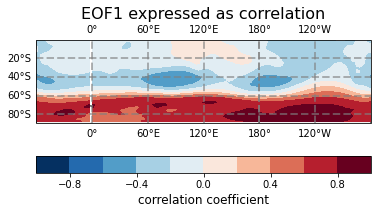

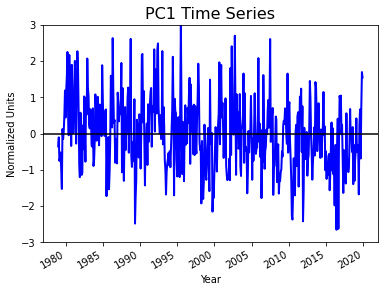

In [15]:
import cartopy.feature as cfeature
# Plot the leading EOF expressed as correlation in the Pacific domain.
clevs = np.linspace(-1, 1, 11)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=120))
fill = eofs[0].plot.contourf(ax=ax, levels=clevs, cmap=plt.cm.RdBu_r,
                             add_colorbar=False, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, facecolor='w', edgecolor='k')
cb = plt.colorbar(fill, orientation='horizontal')
cb.set_label('correlation coefficient', fontsize=12)
ax.set_title('EOF1 expressed as correlation', fontsize=16)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.6, linestyle='--')
# Plot the leading PC time series.
plt.figure()
pcs[:, 0].plot(color='b', linewidth=2)
ax = plt.gca()
ax.axhline(0, color='k')
ax.set_ylim(-3, 3)
ax.set_xlabel('Year')
ax.set_ylabel('Normalized Units')
ax.set_title('PC1 Time Series', fontsize=16)

plt.show()

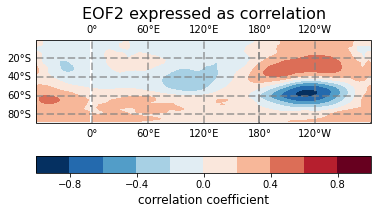

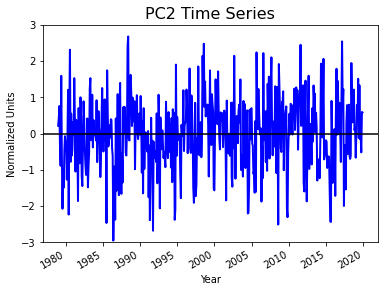

In [16]:
import cartopy.feature as cfeature
# Plot the leading EOF expressed as correlation in the Pacific domain.
clevs = np.linspace(-1, 1, 11)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=120))
fill = eofs[1].plot.contourf(ax=ax, levels=clevs, cmap=plt.cm.RdBu_r,
                             add_colorbar=False, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, facecolor='w', edgecolor='k')
cb = plt.colorbar(fill, orientation='horizontal')
cb.set_label('correlation coefficient', fontsize=12)
ax.set_title('EOF2 expressed as correlation', fontsize=16)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.6, linestyle='--')
# Plot the leading PC time series.
plt.figure()
pcs[:, 1].plot(color='b', linewidth=2)
ax = plt.gca()
ax.axhline(0, color='k')
ax.set_ylim(-3, 3)
ax.set_xlabel('Year')
ax.set_ylabel('Normalized Units')
ax.set_title('PC2 Time Series', fontsize=16)

plt.show()

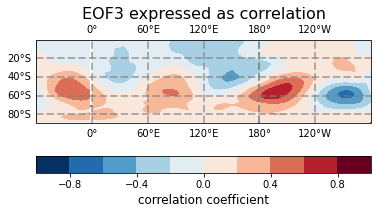

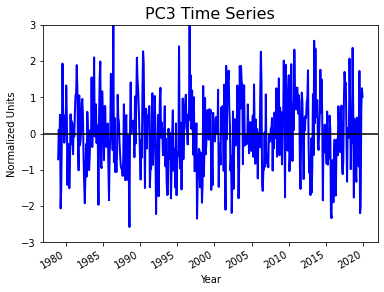

In [17]:

clevs = np.linspace(-1, 1, 11)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=120))
fill = eofs[2].plot.contourf(ax=ax, levels=clevs, cmap=plt.cm.RdBu_r,
                             add_colorbar=False, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, facecolor='w', edgecolor='k')
cb = plt.colorbar(fill, orientation='horizontal')
cb.set_label('correlation coefficient', fontsize=12)
ax.set_title('EOF3 expressed as correlation', fontsize=16)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.6, linestyle='--')
# Plot the leading PC time series.
plt.figure()
pcs[:, 2].plot(color='b', linewidth=2)
ax = plt.gca()
ax.axhline(0, color='k')
ax.set_ylim(-3, 3)
ax.set_xlabel('Year')
ax.set_ylabel('Normalized Units')
ax.set_title('PC3 Time Series', fontsize=16)

plt.show()